# COVID19 DATA ANALYSIS USING PYTHON

IMPORTING LIBRARIES

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

IMPORTING COVID19 DATASET

In [74]:
corona_dataset = pd.read_csv("Untitled Folder/covid19_confirmed_global.csv")
corona_dataset.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,9216,9998,10582,11173,11831,12456,13036,13659,14525,15205
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,981,989,998,1004,1029,1050,1076,1099,1122,1137
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,7918,8113,8306,8503,8697,8857,8997,9134,9267,9394
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,762,762,762,763,763,763,763,764,764,764
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,60,61,69,70,70,71,74,81,84,86


In [75]:
corona_dataset.shape

(266, 135)

 REMOVING USELESS COLUMNS

In [76]:
corona_dataset.drop(["Lat","Long"],axis=1,inplace=True)

In [77]:
corona_dataset.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,9216,9998,10582,11173,11831,12456,13036,13659,14525,15205
1,NaN,Albania,0,0,0,0,0,0,0,0,...,981,989,998,1004,1029,1050,1076,1099,1122,1137
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,7918,8113,8306,8503,8697,8857,8997,9134,9267,9394
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,762,762,762,763,763,763,763,764,764,764
4,NaN,Angola,0,0,0,0,0,0,0,0,...,60,61,69,70,70,71,74,81,84,86


AGGREGATING ROWS BY THE COUNTRY

In [78]:
corona_dataset_aggregated=corona_dataset.groupby("Country/Region").sum()

In [79]:
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,9216,9998,10582,11173,11831,12456,13036,13659,14525,15205
Albania,0,0,0,0,0,0,0,0,0,0,...,981,989,998,1004,1029,1050,1076,1099,1122,1137
Algeria,0,0,0,0,0,0,0,0,0,0,...,7918,8113,8306,8503,8697,8857,8997,9134,9267,9394
Andorra,0,0,0,0,0,0,0,0,0,0,...,762,762,762,763,763,763,763,764,764,764
Angola,0,0,0,0,0,0,0,0,0,0,...,60,61,69,70,70,71,74,81,84,86


In [80]:
corona_dataset_aggregated.shape

(188, 131)

VISUALISING DATA RELATED TO COUNTRY 

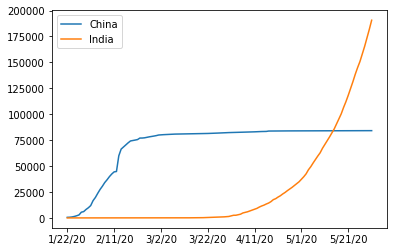

In [81]:
corona_dataset_aggregated.loc["China"].plot()
corona_dataset_aggregated.loc["India"].plot()
plt.legend()

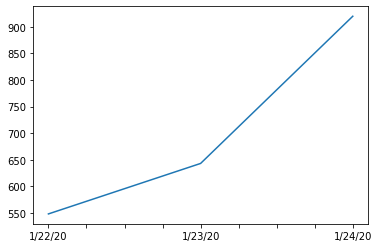

In [82]:
corona_dataset_aggregated.loc["China"][:3].plot()    #in 24 hrs 100 new cases recorded

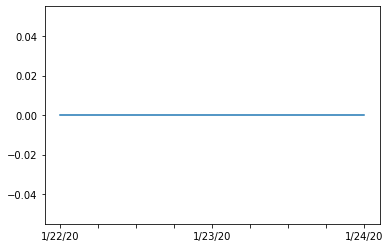

In [83]:
corona_dataset_aggregated.loc["India"][:3].plot()    #in 24 hrs 0 new cases recorded

FINDING MAX INFECTION RATE FOR COUNTRIES

In [84]:
corona_dataset_aggregated.loc["China"].diff().max()

15136.0

In [85]:
corona_dataset_aggregated.loc["India"].diff().max()

8782.0

In [86]:
corona_dataset_aggregated.loc["Spain"].diff().max()

9630.0

In [87]:
corona_dataset_aggregated.loc["Germany"].diff().max()

6933.0

In [88]:
countries = list(corona_dataset_aggregated.index)
max_infection_rates = []
for c in countries:
    max_infection_rates.append(corona_dataset_aggregated.loc[c].diff().max())
corona_dataset_aggregated["max_infection_rate"]=max_infection_rates

In [89]:
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,9998,10582,11173,11831,12456,13036,13659,14525,15205,866.0
Albania,0,0,0,0,0,0,0,0,0,0,...,989,998,1004,1029,1050,1076,1099,1122,1137,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,8113,8306,8503,8697,8857,8997,9134,9267,9394,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,762,762,763,763,763,763,764,764,764,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,61,69,70,70,71,74,81,84,86,8.0


CREATE A NEW DATAFRAME WITH ONLY ONE NEEDED COLUMN

In [90]:
corona_data = pd.DataFrame(corona_dataset_aggregated["max_infection_rate"])
corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,866.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,8.0


IMPORTING WORLD HAPPINESS REPORT DATASET

In [91]:
happiness_report = pd.read_csv("Untitled Folder/World Happiness Report.csv")
happiness_report.head(10)

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,94.6,Western Europe
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,93.5,Western Europe
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,94.5,Western Europe
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,93.7,Western Europe
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,91.2,Western Europe
5,Netherlands,6,7.377,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804,93.8,Western Europe
6,Canada,7,7.316,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264,90.5,North America
7,New Zealand,8,7.314,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456,88.6,Asia-Pacific
8,Sweden,9,7.284,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538,92.7,Western Europe
9,Australia,10,7.284,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211,89.2,Asia-Pacific


In [92]:
useless_cols = ["Happiness Rank","Happiness Score","Generosity","Corruption","Job Satisfaction"]

REMOVING USELESS COLUMNS

In [93]:
happiness_report.drop(useless_cols,axis=1,inplace=True)
happiness_report.head()

,Country,Economy,Family,Health,Freedom,Dystopia,Region
0,Norway,1.616463,1.533524,0.796667,0.635423,2.277027,Western Europe
1,Denmark,1.482383,1.551122,0.792566,0.626007,2.313707,Western Europe
2,Iceland,1.480633,1.610574,0.833552,0.627163,2.322715,Western Europe
3,Switzerland,1.564980,1.516912,0.858131,0.620071,2.276716,Western Europe
4,Finland,1.443572,1.540247,0.809158,0.617951,2.430182,Western Europe


CHANGING INDICES OF DATAFRAME 

In [95]:
happiness_report.set_index("Country",inplace=True)
happiness_report.head()

,Economy,Family,Health,Freedom,Dystopia,Region
Country,,,,,,
Norway,1.616463,1.533524,0.796667,0.635423,2.277027,Western Europe
Denmark,1.482383,1.551122,0.792566,0.626007,2.313707,Western Europe
Iceland,1.480633,1.610574,0.833552,0.627163,2.322715,Western Europe
Switzerland,1.564980,1.516912,0.858131,0.620071,2.276716,Western Europe
Finland,1.443572,1.540247,0.809158,0.617951,2.430182,Western Europe


JOIN THE TWO DATASETS PREPARED

In [96]:
corona_data.shape

(188, 1)

In [97]:
happiness_report.shape

(153, 6)

In [98]:
data=corona_data.join(happiness_report,how="inner")
data.head()

,max_infection_rate,Economy,Family,Health,Freedom,Dystopia,Region
Afghanistan,866.0,0.401477,0.581543,0.180747,0.106180,2.150801,Asia-Pacific
Albania,34.0,0.996193,0.803685,0.731160,0.381499,1.490442,Eastern Europe
Algeria,199.0,1.091864,1.146217,0.617585,0.233336,2.567604,Africa
Angola,8.0,0.858428,1.104412,0.049869,0.000000,1.614482,Africa
Argentina,795.0,1.185295,1.440451,0.695137,0.494519,2.614005,Latin America


CORRELATION MATRIX

In [99]:
data.corr()

,max_infection_rate,Economy,Family,Health,Freedom,Dystopia
max_infection_rate,1.000000,0.197259,0.152692,0.219370,0.079893,0.173223
Economy,0.197259,1.000000,0.695156,0.843024,0.387659,0.019752
Family,0.152692,0.695156,1.000000,0.624839,0.429854,0.069687
Health,0.219370,0.843024,0.624839,1.000000,0.378420,0.071935
Freedom,0.079893,0.387659,0.429854,0.378420,1.000000,0.104599
Dystopia,0.173223,0.019752,0.069687,0.071935,0.104599,1.000000


VISUALIZATION THE RESULTS

In [100]:
data.head()

,max_infection_rate,Economy,Family,Health,Freedom,Dystopia,Region
Afghanistan,866.0,0.401477,0.581543,0.180747,0.106180,2.150801,Asia-Pacific
Albania,34.0,0.996193,0.803685,0.731160,0.381499,1.490442,Eastern Europe
Algeria,199.0,1.091864,1.146217,0.617585,0.233336,2.567604,Africa
Angola,8.0,0.858428,1.104412,0.049869,0.000000,1.614482,Africa
Argentina,795.0,1.185295,1.440451,0.695137,0.494519,2.614005,Latin America


PLOTTING ECONOMY VS MAX INFECTION RATE

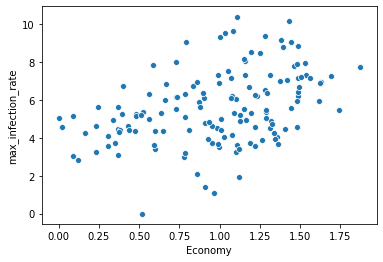

In [103]:
x = data["Economy"]
y = data["max_infection_rate"]
sns.scatterplot(x,np.log(y))

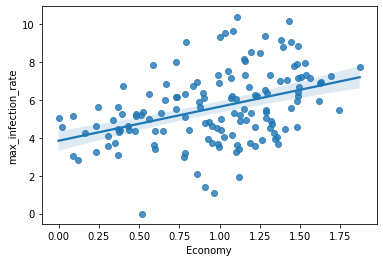

In [104]:
sns.regplot(x,np.log(y))

PLOTTING HEALTH VS MAX INFECTION RATE

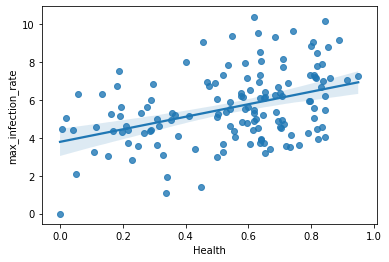

In [105]:
h = data["Health"]
sns.regplot(h,np.log(y))

PLOTTING FREEDOM VS MAX INFECTION RATE

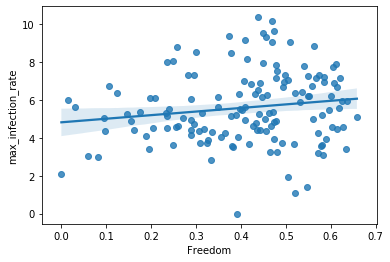

In [106]:
f = data["Freedom"]
sns.regplot(f,np.log(y))